# Machine Learning Pipeline

A machine learning **pipeline** can be created by putting together a sequence of steps involved in training a machine learning model. <br>

The pipeline can be used to automate a machine learning workflow.<br>

The pipeline can involve pre-processing, feature selection, classification/regression, post-processing, etc... <br>

Pipelines may also help optimizing the model: tuning the model for the best performance. <br>

## A classification problem without pipeline

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
import numpy as np

dataset=load_iris()

X = dataset.data
y = dataset.target
featNames=np.array(dataset.feature_names)

# Feature Scaling :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(np.ravel(y))
print(y)

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  
    y, 
    test_size=0.2,
    random_state=0)
 
print(X_train.shape)
print(X_test.shape)

# A Classifier Without a Pipeline
knn = KNeighborsClassifier().fit(X_train, y_train)
print(f"Training set score: {knn.score(X_train,y_train)}")
print(f"Test set score: {knn.score(X_test,y_test)}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(120, 4)
(30, 4)
Training set score: 0.9583333333333334
Test set score: 1.0


## The same classification problem with a pipeline

In this simple example we are going to set up a basic pipeline that consists of the following sequence:

1. Scaler: for pre-processing data, i.e., transform the data to zero mean and unit variance using the `StandardScaler()`.
2. Feature selector: using `VarianceThreshold()` for discarding features whose variance is less than a certain defined threshold.
3. Classifier: `KNeighborsClassifier()`, which implements the k-nearest neighbor classifier and selects the class of the majority `k` points, which are closest to the test example.



In [4]:
import seaborn as sns  
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.pipeline import Pipeline   
from sklearn.feature_selection import VarianceThreshold # Feature selector
import numpy as np
import pandas as pd

dataset=load_iris()

X = dataset.data
y = dataset.target
featNames=np.array(dataset.feature_names)

# Feature Scaling :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(np.ravel(y))
print(y)

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  
    y, 
    test_size=0.2,
    random_state=0)
 
print(X_train.shape)
print(X_test.shape)

# A Classifier Without a Pipeline
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])
 
pipe.fit(X_train, y_train)
 
print(f"Training set score: {pipe.score(X_train,y_train)}")
print(f"Test set score: {pipe.score(X_test,y_test)}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(120, 4)
(30, 4)
Training set score: 0.9583333333333334
Test set score: 1.0


Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', KNeighborsClassifier())])

Training set score: 0.9583333333333334
Test set score: 1.0


## Optimizing and Tuning the Pipeline

In order to optimize the model, we could:
- Search for the best scalers: instead of the `StandardScaler()`, we can try `MinMaxScaler()`, `Normalizer()` and `MaxAbsScaler()`.
- Search for the best variance threshold to use in the `VarianceThreshold()`.
- Search for the best value of `k` for the `KNeighborsClassifier()`.

These parameters could be provided to the pipeline via a Python `dict`.<br>
In the `dict`, the key must be written, with a double underscore `__` separating the module name that we selected in the `Pipeline()` and its parameter.


In [28]:

parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
	'classifier__n_neighbors': [1, 3, 5, 7, 10],
	'classifier__p': [1, 2],
	'classifier__leaf_size': [1, 5, 10, 15]
}


The pipeline along with the above list of parameters are then passed to a **GridSearchCV()** object.<br>

The object is so named because it sets up a multi-dimensional grid, with each corner representing a combination of parameters to try. <br>
For each corner of the above grid, the `GridSearchCV()` object computes the mean cross-validation score on the unseen examples and selects the corner/combination of parameters that give the best result.
<br>

By tuning the pipeline, we can obtain quite an improvement over a simple classifier and a non-optimized pipeline. <br>

It is then important to analyze the results of the optimization process.<br>

In [29]:
from sklearn.model_selection import GridSearchCV 

grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)
 
print(f"Training set score: {grid.score(X_train,y_train)}")
print(f"Test set score: {grid.score(X_test,y_test)}")

Training set score: 1.0
Test set score: 0.9666666666666667


The code below shows how to access the best parameters of the grid and the best pipeline for our task.

In [30]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 1, 'classifier__p': 2, 'scaler': MaxAbsScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=1))])


Another useful technique for analyzing the results is to construct a `DataFrame` from the grid using the attribute **cv_results_**. <br>

This DataFrame is very valuable as it shows us the scores for different parameters.<br>

The column with the **mean_test_score** is the average of the scores on the test set for all the folds during cross-validation. <br>

This DataFrame can then be plotted.<br>

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


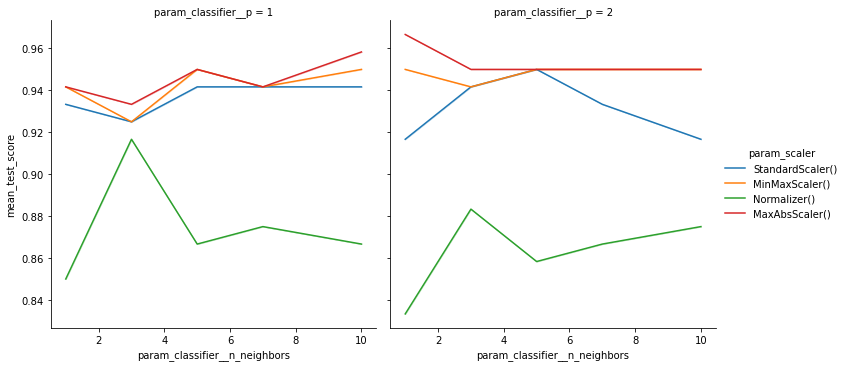

In [33]:
df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(df.columns)
sns.relplot(data=df,
	kind='line',
	x='param_classifier__n_neighbors',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__p')